In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
df = pd.read_csv('Greenhouse Plant Growth Metrics.csv')
df.head()

,Random,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG,Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA


In [2]:
df_clean = df.iloc[:,1:-1]
df_clean.corr()

,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG
ACHP,1.000000,-0.013622,0.427460,-0.401833,-0.385251,-0.415854,-0.379075,-0.120607,-0.592119,-0.376681,0.115942,0.000107
PHR,-0.013622,1.000000,0.493050,0.635731,0.090495,-0.087562,-0.052952,0.514732,0.202433,0.006415,0.573550,-0.088112
AWWGV,0.427460,0.493050,1.000000,0.266280,-0.104903,-0.166862,-0.096338,0.393870,-0.215712,-0.059155,0.701240,0.000532
ALAP,-0.401833,0.635731,0.266280,1.000000,0.404359,0.326802,0.399542,0.391506,0.604169,0.419564,0.366951,-0.007883
ANPL,-0.385251,0.090495,-0.104903,0.404359,1.000000,0.512514,0.778143,0.141591,0.537721,0.528448,-0.002440,0.555486
ARD,-0.415854,-0.087562,-0.166862,0.326802,0.512514,1.000000,0.833025,-0.116574,0.722004,0.963054,-0.168133,-0.144971
ADWR,-0.379075,-0.052952,-0.096338,0.399542,0.778143,0.833025,1.000000,-0.187510,0.705628,0.876905,-0.218848,0.344392
PDMVG,-0.120607,0.514732,0.393870,0.391506,0.141591,-0.116574,-0.187510,1.000000,-0.102200,-0.195834,0.913545,0.032238
ARL,-0.592119,0.202433,-0.215712,0.604169,0.537721,0.722004,0.705628,-0.102200,1.000000,0.771567,-0.183255,-0.110905
AWWR,-0.376681,0.006415,-0.059155,0.419564,0.528448,0.963054,0.876905,-0.195834,0.771567,1.000000,-0.196339,-0.131328


In [3]:
y_full = df_clean.loc[:,'AWWR']
x_full = df_clean.loc[:,('ALAP','ANPL','ARD','ADWR')]
b = np.ones((x_full.shape[0],1))
x_bias = np.hstack((b,x_full)) # Fit intercept false if you do this, the regular model will just fit so you don't have to do this explicitly

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test, y_train,y_test = train_test_split(x_bias,y_full)
x_train.shape

(22500, 5)

In [6]:
reg = LinearRegression(fit_intercept=False).fit(x_train,y_train)
reg.coef_

array([-2.75494485e+00,  5.59781957e-04, -3.50730919e-01,  3.20447494e-01,
        1.23164842e+00])

In [7]:
reg.score(x_test,y_test)

0.9608324162987362

0.26632727221425495

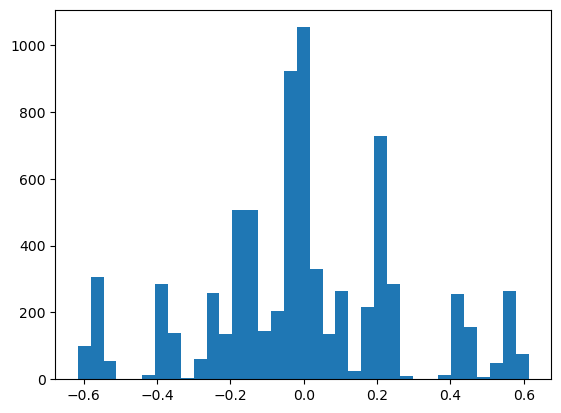

In [8]:
residuals = y_test - reg.predict(x_test)

plt.hist(residuals, bins='auto')
residuals.std()

In [17]:
df_clean.iloc[:4,:]

,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG
0,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906
1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697
2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875
3,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661


4667.82373765721